In [5]:
import numpy as np
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import math
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
your_mesh = mesh.Mesh.from_file('a380.stl')

# The mesh normals (calculated automatically)

print(your_mesh.normals.shape)
print(your_mesh.v0.shape)
# The mesh vectors
your_mesh.v0, your_mesh.v1, your_mesh.v2
# Accessing individual points (concatenation of v0, v1 and v2 in triplets)
assert (your_mesh.points[0][0:3] == your_mesh.v0[0]).all()
assert (your_mesh.points[0][3:6] == your_mesh.v1[0]).all()
assert (your_mesh.points[0][6:9] == your_mesh.v2[0]).all()
assert (your_mesh.points[1][0:3] == your_mesh.v0[1]).all()

your_mesh.save('new_stl_file.stl')

(38416, 3)
(38416, 3)


In [24]:
your_mesh.points[15]

array([-1.836806,  0.22037 , -0.791653, -1.857345,  0.22757 , -0.791653,
       -1.86003 ,  0.225773, -0.630396], dtype=float32)

In [26]:
your_mesh.normals

array([[ 1.6964108e-04,  3.5133131e-03,  4.7620892e-05],
       [ 1.6238427e-04,  3.3672159e-03,  4.5666846e-05],
       [ 1.2776295e-04,  2.6493049e-03,  1.6237094e-04],
       ...,
       [ 1.0234936e-07, -2.8318996e-07, -1.7131772e-05],
       [ 0.0000000e+00,  0.0000000e+00, -3.2653519e-05],
       [ 0.0000000e+00,  0.0000000e+00, -3.2660224e-05]], dtype=float32)

/tmp/ipykernel_3528/3514115489.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = mplot3d.Axes3D(figure)


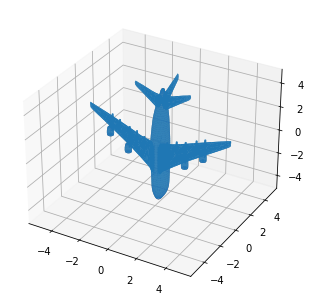

In [3]:
## Modifying Mesh objects

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('a380.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

Draw vector 0

In [60]:

# Pass xyz to Open3D.o3d.geometry.PointCloud and visualize
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(your_mesh.v0)

downpcd = pcd.voxel_down_sample(voxel_size=0.5)

downpcd.estimate_normals(search_param = o3d.geometry.KDTreeSearchParamHybrid(radius=1,
                                                          max_nn=30) )
o3d.visualization.draw_geometries([downpcd])

In [9]:
print(len(downpcd.normals))
print(downpcd.normals[0])

276
[0.98575186 0.16731849 0.0172567 ]


Draw vector 1

In [10]:

# Pass xyz to Open3D.o3d.geometry.PointCloud and visualize
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(your_mesh.v1 )
downpcd = pcd.voxel_down_sample(voxel_size=0.5)

downpcd.estimate_normals(search_param = o3d.geometry.KDTreeSearchParamHybrid(radius=1,
                                                          max_nn=30) )
o3d.visualization.draw_geometries([downpcd])

In [11]:
print(len(downpcd.normals))
print(downpcd.normals[0])

267
[ 0.9378788   0.29907342 -0.17589327]


Draw vector 2

In [12]:

# Pass xyz to Open3D.o3d.geometry.PointCloud and visualize
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(your_mesh.v2 )
downpcd = pcd.voxel_down_sample(voxel_size=0.5)

downpcd.estimate_normals(search_param = o3d.geometry.KDTreeSearchParamHybrid(radius=1,max_nn=30) )
o3d.visualization.draw_geometries([downpcd])

In [13]:
print(len(downpcd.normals))
print(downpcd.normals[0])

276
[0.98575186 0.16731849 0.0172567 ]


Sample from mesh file and draw normals


In [54]:
import open3d as o3d
#pcd = o3d.io.read_point_cloud(input_file)

mesh = o3d.io.read_triangle_mesh("a380.stl")

pcd = mesh.sample_points_uniformly(number_of_points=50)
#downpcd = pcd.voxel_down_sample(voxel_size=0.005)
pcd.estimate_normals(search_param = o3d.geometry.KDTreeSearchParamHybrid(radius=2,
                                                          max_nn=3) )
o3d.visualization.draw_geometries([pcd])

In [19]:
print(len(pcd.normals))
print(pcd.normals[0])

50
[ 0.58181409 -0.29466299  0.75806733]


Mesh2pcd Visualization

In [50]:
mesh = o3d.io.read_triangle_mesh("a380_stl.stl")
pcd = o3d.geometry.PointCloud()
pcd.points = mesh.vertices
pcd.colors = mesh.vertex_colors
pcd.normals = mesh.vertex_normals
mesh.sample_points_uniformly(number_of_points=10)
mesh.compute_triangle_normals()
o3d.visualization.draw_geometries([pcd])

In [56]:
print("Try to render a mesh with normals (exist: " +
      str(mesh.has_vertex_normals()) + ") and colors (exist: " +
      str(mesh.has_vertex_colors()) + ")")
o3d.visualization.draw_geometries([mesh])
print("A mesh with no normals and no colors does not look good.")

Try to render a mesh with normals (exist: True) and colors (exist: False)
A mesh with no normals and no colors does not look good.


Surface normal estimation

In [27]:
print("Computing normal and rendering it.")
mesh.compute_vertex_normals()
print(np.asarray(mesh.triangle_normals))
o3d.visualization.draw_geometries([mesh])

Computing normal and rendering it.
[[ 0.0482246   0.99874478  0.0135374 ]
 [ 0.04816468  0.99874756  0.01354521]
 [ 0.0480791   0.99697285  0.0611026 ]
 ...
 [ 0.00597332 -0.01652755 -0.99984557]
 [ 0.          0.         -1.        ]
 [ 0.          0.         -1.        ]]


## Calculate Normals of Mesh Triangles

Vertex clustering

In [87]:
mesh_in = o3d.io.read_triangle_mesh("a380_stl.stl")
mesh_in.compute_vertex_normals()
print(
    f'Input mesh has {len(mesh_in.vertices)} vertices and {len(mesh_in.triangles)} triangles'
)
o3d.visualization.draw_geometries([mesh_in])

voxel_size = max(mesh_in.get_max_bound() - mesh_in.get_min_bound()) / 32
print(f'voxel_size = {voxel_size:e}')
mesh_smp = mesh_in.simplify_vertex_clustering(
    voxel_size=voxel_size,
    contraction=o3d.geometry.SimplificationContraction.Average)
print(
    f'Simplified mesh has {len(mesh_smp.vertices)} vertices and {len(mesh_smp.triangles)} triangles'
)
o3d.visualization.draw_geometries([mesh_smp])

voxel_size = max(mesh_in.get_max_bound() - mesh_in.get_min_bound()) / 16
print(f'voxel_size = {voxel_size:e}')
mesh_smp = mesh_in.simplify_vertex_clustering(
    voxel_size=voxel_size,
    contraction=o3d.geometry.SimplificationContraction.Average)
print(
    f'Simplified mesh has {len(mesh_smp.vertices)} vertices and {len(mesh_smp.triangles)} triangles'
)
o3d.visualization.draw_geometries([mesh_smp])



Input mesh has 19260 vertices and 38416 triangles
voxel_size = 3.090316e-01
Simplified mesh has 654 vertices and 1516 triangles
voxel_size = 6.180633e-01
Simplified mesh has 206 vertices and 518 triangles


In [88]:

mesh_smp.compute_vertex_normals()
mesh_smp.compute_triangle_normals()
print(mesh_smp.has_triangle_normals())
triangle_normals = np.asarray(mesh_smp.triangle_normals)
o3d.visualization.draw_geometries([mesh_smp])

True


In [85]:
triangle_normals.shape

(106, 3)

In [90]:
#pcd = mesh_smp.sample_points_uniformly(number_of_points=518)
pcd = o3d.geometry.PointCloud()
pcd.points = mesh_smp.vertices
pcd.colors = mesh_smp.vertex_colors
pcd.normals = mesh_smp.triangle_normals
#pcd.normals = mesh_smp.vertex_normals
#downpcd = pcd.voxel_down_sample(voxel_size=0.005)
pcd.estimate_normals(search_param = o3d.geometry.KDTreeSearchParamHybrid(radius=1,
                                                          max_nn=3))
o3d.visualization.draw_geometries([pcd])

In [80]:
pcd_normals = np.asarray(pcd.normals)
pcd_normals.shape

(206, 3)

In [81]:
print("pcd normals", pcd_normals[0])
print("triangle normals", triangle_normals[0])

pcd normals [-0.07736151 -0.08623758 -0.99326647]
triangle normals [ 0.00787682  0.98936961 -0.14520928]
